<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Изучим данные, предоставленные сервисом для проекта.

## Подготовка данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  
from sklearn.utils import shuffle 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#сохраним датасет и посмотрим всю информацию о нём
df = pd.read_csv('/datasets/Churn.csv')

def info_df(df): 
    display(df.head()) #первые пять строк
    display(df.info()) #общую информацию
    display(df.describe()) #статистическую информацию
    display(df.isna().sum()) #пропуски
    display(df.duplicated().sum()) #дубликаты
                     
display(info_df(df))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

0

None

Изучив информацию о датасете, вдим: синтаксические и стилистические нарушения, пропуски в столбце Tenure, дубликатов нет. В столбце Баланс возможен выброс. Максимальное значение намного больше среднего. 

<body>
Обратимся к описанию данных.<br/>

Признаки:<br/> 
RowNumber — индекс строки в данных;<br/> 
CustomerId — уникальный идентификатор клиента;<br/> 
Surname — фамилия;<br/> 
CreditScore — кредитный рейтинг;<br/> 
Geography — страна проживания;<br/> 
Gender — пол;<br/> 
Age — возраст;<br/>
Tenure — сколько лет человек является клиентом банка;<br/> 
Balance — баланс на счёте;<br/> 
NumOfProducts — количество продуктов банка, используемых клиентом;<br/> 
HasCrCard — наличие кредитной карты;<br/> 
IsActiveMember — активность клиента;<br/> 
EstimatedSalary — предполагаемая зарплата.<br/> 

Целевой признак:<br/> 
Exited — факт ухода клиента.<br/>
    </body>

Для дальнешего исследования необходимо подготовить данные: удалим лишние столбцы (они не нужны для исследования оттока клиентов), привести именования столбцов к нижнему регистру и к стилистическому и синтаксическому стилю, подумать что делать с пропусками.

In [3]:
df = df.drop(columns = ['Surname', 'CustomerId', 'RowNumber'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [4]:
#переименуем столбцы и приведём к нижнему регистру
df = df.rename(columns={
                  "CreditScore": "Credit_Score",
                  "NumOfProducts": "Num_Of_Products",
                  "HasCrCard": "Has_Cr_Card",
                  "IsActiveMember": "Is_Active_Member",
                  "EstimatedSalary": "Estimated_Salary"})

df.columns = [x.lower() for x in df.columns]
df.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Теперь обдумаем как заменить пропуски в столбце tenure.

In [5]:
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

<AxesSubplot:>

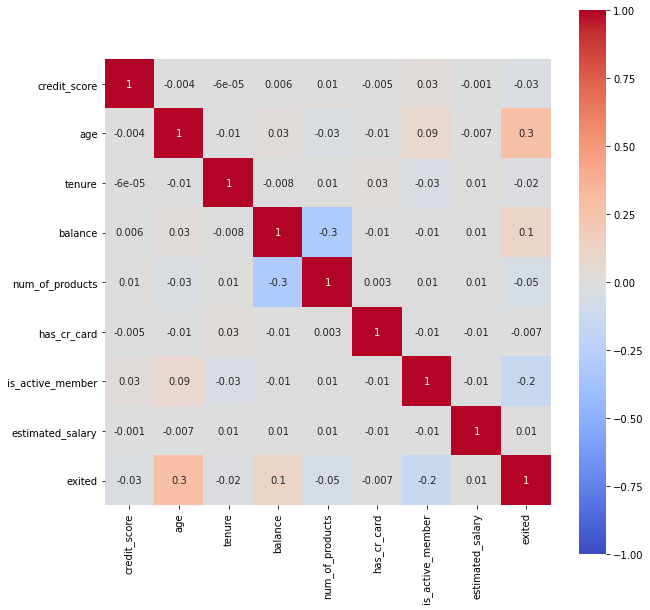

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Корреляция очень слабая и ничего сказать о зависимости нельзя. Поэтому заменим значения медианой и переведём в целочисленный тип данных. Всё таки скоько лет человек явялялся клиентом банка предполагает целое число лет.

In [7]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [8]:
df['tenure'] = df['tenure'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Поскольку в датасете есть категориальны признаки, необходимо их преобразовать. Остановимся на технике One-Hot Encoding. Она подходит для решения нашей задачи: работает со всеми моделями.

In [9]:
#посмотрим какие страны есть в столбце
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
#применяем технику OHE
df_ohe = pd.get_dummies(df, drop_first=True) 
display(df_ohe.head(10))

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [11]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


Из таблицы вылетел столбец Франция, ничего страшного, поскольку Францию можно опознать просто по отсутствию единиц в остальных столбцах.

Поскольку после кодирования в наименовании новых столбцов появились заглавные буквы, приведём еще раз всё в нижний регистр. А столбец gender_Male всё же лучше переименовать просто в gender. 

In [12]:
df_ohe = df_ohe.rename(columns={"gender_Male": "gender"})

df_ohe.columns = [x.lower() for x in df_ohe.columns]
df_ohe.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [13]:
#признаки и цели для исходного датасета
target = df_ohe['exited'] 
features = df_ohe.drop('exited', axis=1) 

train, validate, test = np.split(df_ohe.sample(frac=1, random_state=12345),  [int(.6*len(df)), int(.8*len(df))])

#признаки и цель для обучающей выборки
features_train = train.drop(['exited'], axis=1)
target_train = train['exited']

#признаки и цель для валидационной выборки
features_validate = validate.drop(['exited'], axis=1)
target_validate = validate['exited']

#признаки и цель для тестовой выборки
features_test = test.drop(['exited'], axis=1)
target_test = test['exited']

#посмотрим на размер новых даатасетов
def info_df(features_train, target_train, features_validate, target_validate, features_test, target_test): #на вход функция принимает все датасеты сразу
    df_all = [features_train, target_train, features_validate, target_validate, features_test, target_test]
    for i in df_all:
        print(i.shape)
                    
display(info_df(features_train, target_train, features_validate, target_validate, features_test, target_test))

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


None

In [14]:
#масштабирование
numeric = ['estimated_salary', 'balance', 'age', 'credit_score'] 

scaler = StandardScaler() #Создадим объект этой структуры и настроим его на обучающих данных. Настройка — это вычисление среднего и дисперсии 

scaler.fit(features_train[numeric])  

features_train[numeric] = scaler.transform(features_train[numeric]) 

features_validate[numeric] = scaler.transform(features_validate[numeric]) 

features_test[numeric] = scaler.transform(features_test[numeric]) 

display(features_train.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender
7867,-0.095446,0.692527,3,-1.207343,1,1,1,0.967598,0,1,0
1402,1.108213,-0.948724,8,0.869462,1,1,0,-0.403069,0,0,1
8606,1.622597,0.306351,5,-1.207343,2,1,1,-0.447751,0,1,1
8885,0.192609,0.595983,4,0.426066,2,1,1,1.004463,0,1,1
6494,0.511528,-1.045268,7,-1.207343,2,1,1,-1.356118,0,0,1


## Исследование задачи

<body>Обучим каждую модель и сразу посмотрим на всю необходимую информацию по каждой модели: Accuracy на валидационной и тестовой выборках, F1-меру, AUC-ROC и матрицу ошибок.<br/>
* F1-мера (англ. F1-score). Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1. Посмотрим эту метрику на каждой модели.<br/>
* Чтобы выявить, как сильно наилучшая модель отличается от случайной, посчитаем AUC-ROC. Эта метрика качества изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5. Чем график выше, тем больше значение TPR и лучше качество модели.<br/>
* Наглядно представить результаты вычислений метрик точности и полноты позволяет матрица ошибок.
    </body>

'Accuracy модели дерево решений на валидационной выборке:'

0.8525

,max_depth,accuracy
4,5,0.8525
3,4,0.8430
2,3,0.8370
1,2,0.8290
0,1,0.7965


'Accuracy модели дерево решений на тестовой выборке:'

0.853

'F1-мера модели случайный лес на валидационной выборке:'

0.4741532976827094

'auc_roc:'

0.8088920970276903

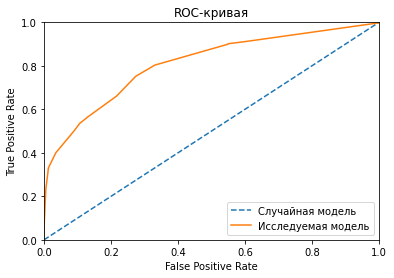

'Матрица ошибок: '

array([[1572,   21],
       [ 274,  133]])

In [15]:
#Дерево решений
ff = []

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    model.fit(features_train, target_train) #обучаем на тренировочной выборке,
    
    predictions_validate = model.predict(features_validate) #а предсказание - на валидационной
           
    ff.append({'max_depth': depth, 'accuracy': accuracy_score(target_validate, predictions_validate)})   
        
ff = pd.DataFrame(ff)
display("Accuracy модели дерево решений на валидационной выборке:", max(ff['accuracy']))
display(ff.sort_values('accuracy', ascending=False))

pred = model.score(features_test, target_test) #посчитаем качество модели на тестовой выборке
display("Accuracy модели дерево решений на тестовой выборке:", pred)

f1 = f1_score(target_validate, predictions_validate)
display("F1-мера модели случайный лес на валидационной выборке:", f1) 

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая')
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

display("Матрица ошибок: ", confusion_matrix(target_validate,  predictions_validate))  

In [ ]:
#Случайный лес
best_model = None
best_result = 0
for est in range(1, 11):
    for n_samples in range(1, 20):
        for depth in range(1, 15):
            model = RandomForestClassifier(  #обучаем с заданными параметрами:
                random_state=12345, 
                max_depth = depth, #максимальная глубина деревьев
                n_estimators=est,  #число «деревьев» в «случайном лесу»
                n_jobs = -1, #распараллеливание,используются все ядра, имеющиеся на машине 
                max_features = 'auto', #число признаков, по которым ищется разбиение
                min_samples_leaf = n_samples)  #минимальное число объектов в листьях
            model.fit(features_train, target_train) #обучаем модель на тренировочной выборке
            result = model.score(features_validate, target_validate) #посчитаем кач-во модели на валидационной выборке
            if result > best_result:
                best_model = model #сохраняем наилучшую модель
                best_result = result #сохраняем наилучшее значение метрики accuracy на валидационных данных

display("Accuracy модели случайный лес на валидационной выборке:", best_result)

pred = best_model.score(features_test, target_test) #посчитаем качество модели на тестовой выборке
display("Accuracy модели случайный лес на тестовой выборке:", pred)

predicted_valid = best_model.predict(features_validate)
f1 = f1_score(target_validate, predicted_valid)
display("F1-мера модели случайный лес на валидационной выборке:", f1) 

probabilities_valid = best_model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

display("Матрица ошибок: ", confusion_matrix(target_validate, predicted_valid))

'Accuracy модели логистической регрессии на валидационной выборке:'

0.812

'Accuracy модели логистическая регрессия на тестовой выборке:'

0.795

'F1-мера модели случайный лес на валидационной выборке:'

0.2985074626865672

'auc_roc:'

0.7650979176402904

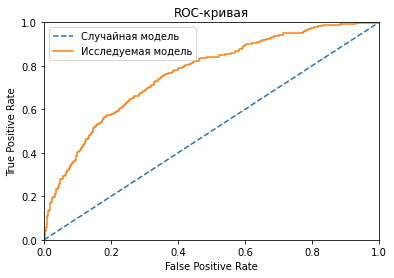

'Матрица ошибок: '

array([[1544,   49],
       [ 327,   80]])

In [17]:
#Логистическая регрессия
model = LogisticRegression(random_state=12345) #инициализируем модель логистической регрессии с параметром random_state=12345
model.fit(features_train, target_train) #обучим модель на тренировочной выборке
result = model.score(features_validate, target_validate) #получим метрику качества модели на валидационной выборке
 
display("Accuracy модели логистической регрессии на валидационной выборке:", result)

pred = model.score(features_test, target_test) #посчитаем качество модели на тестовой выборке
display("Accuracy модели логистическая регрессия на тестовой выборке:", pred)

predicted_valid = model.predict(features_validate) 
f1 = f1_score(target_validate, predicted_valid)
display("F1-мера модели случайный лес на валидационной выборке:", f1) 

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

display("Матрица ошибок: ", confusion_matrix(target_validate, predicted_valid))  

Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0».

0    0.7963
1    0.2037
Name: exited, dtype: float64

<AxesSubplot:>

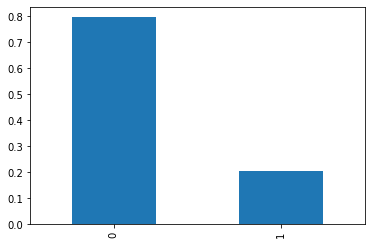

In [18]:
class_frequency = df_ohe['exited'].value_counts(normalize=True) 

display(class_frequency) 

class_frequency.plot(kind='bar') 

Тут виден явный дисбаланс в классах. Положительных значений намного меньше чем отрицательных. 

In [19]:
#создадим константную модель.
target_pred_constant = pd.Series(0, index=target.index) 

display(accuracy_score(target, target_pred_constant))

0.7963

Качество констатной модели равно 0.79, что равняется частотному классу.

**Вывод**

По всей информации о трёх моделях можно сделать такие вывод: самый большой показатель F1-меры у модели случайный лес - 0,54, также как и auc-roc - 0.82. В матрице ошибок все значения у всех трёх моделей сместились в сторону TN - истинноотрицательных, то есть предсказание и фактическое значение класса отрицаельные. Далее по количеству значений видны ложноотрицательные , когда модель предсказала 0, а на самом деле 1. Истинно-положительных значений ещё меньше, это когда моедль отметила объект 1 и его фактическое значение 1. А ложноположительных значений меньше всего - модель предсказала 1, а на самом деле 0.

## Борьба с дисбалансом

Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно. 

Посмотрим на классы и подготовим их к увеличению/ уменьшению выборки.

In [20]:
features_zeros = features_train[target_train == 0]  

features_ones = features_train[target_train == 1]  

target_zeros = target_train[target_train == 0]  

target_ones = target_train[target_train == 1]  

display(features_zeros.shape) 
display(features_ones.shape) 
display(target_zeros.shape) 
display(target_ones.shape) 

(4807, 11)

(1193, 11)

(4807,)

(1193,)

Объектов для положительного класса намного меньше.

**Увеличение выборки.**

In [21]:
def upsample(features, target, repeat): 
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 

    target_zeros = target[target == 0] 
    target_ones = target[target == 1] 

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
    return features_upsampled, target_upsampled  

features_upsampled, target_upsampled = upsample(features_train, target_train, 10) 


display(features_upsampled.shape) 
display(target_upsampled.shape)

(16737, 11)

(16737,)

Перед обучением, подберём наилучшие гиперпараметры для каждой модели методом GridSearchCV

In [ ]:
#объявляем классификатор RandomForest, не внося в него никаких параметров
clf = RandomForestClassifier()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
parametrs = {'n_estimators': range (10, 51, 10),
            'max_depth': range (1,13, 2),
            'min_samples_leaf': range (1,8),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_upsampled, target_upsampled)

#Выводим результат
display(grid.best_params_)

In [ ]:
#объявляем классификатор DecisionTreeClassifier, не внося в него никаких параметров
clf = DecisionTreeClassifier()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
parametrs = {'max_depth': range (1,13, 2),
            'min_samples_leaf': range (1,8),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_upsampled, target_upsampled)

#Выводим результат
display(grid.best_params_)

In [ ]:
#объявляем классификатор LogisticRegression, не внося в него никаких параметров
clf = LogisticRegression()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']

parametrs = {'solver': solver_options, 'multi_class': multi_class_options}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_upsampled, target_upsampled)

#Выводим результат
display(grid.best_params_)

Обучим подготовленные данные на разных моделях и посмотрим F1-меру и auc_roc на графиках.

In [ ]:
#Дерево решений
model = DecisionTreeClassifier(random_state=12345, max_depth = 11, min_samples_leaf = 1, min_samples_split = 6)  
model.fit(features_upsampled, target_upsampled)  
predicted_valid = model.predict(features_validate)  

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1]  
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid)) 
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show()

In [ ]:
#Случайный лес
model = RandomForestClassifier(random_state=12345, max_depth = 11, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)  
model.fit(features_upsampled, target_upsampled)  
predicted_valid = model.predict(features_validate)  
probabilities_valid = model.predict_proba(features_validate) 

probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid))
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show()  

In [ ]:
#Логистическая регрессия
model = LogisticRegression(random_state=12345, multi_class='multinomial', solver='newton-cg')  

model.fit(features_upsampled, target_upsampled)  
predicted_valid = model.predict(features_validate)  

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid))
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

**Уменьшение выборки.**

In [ ]:
def downsample(features, target, fraction): 
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 
    target_zeros = target[target == 0] 
    target_ones = target[target == 1] 

    features_downsampled = pd.concat( 
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    
    target_downsampled = pd.concat( 
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 
    
    features_downsampled, target_downsampled = shuffle( 
        features_downsampled, target_downsampled, random_state=12345) 
    
    return features_downsampled, target_downsampled 
 
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1) 
 

display(features_downsampled.shape) 
display(target_downsampled.shape)

Перед обучением, подберём наилучшие гиперпараметры для каждой модели методом GridSearchCV

In [ ]:
#объявляем классификатор RandomForest, не внося в него никаких параметров
clf = RandomForestClassifier()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
parametrs = {'n_estimators': range (10, 51, 10),
            'max_depth': range (1,13, 2),
            'min_samples_leaf': range (1,8),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_downsampled, target_downsampled)

#Выводим результат
display(grid.best_params_)

In [ ]:
#объявляем классификатор DecisionTreeClassifier, не внося в него никаких параметров
clf = DecisionTreeClassifier()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
parametrs = {'max_depth': range (1,13, 2),
            'min_samples_leaf': range (1,8),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_downsampled, target_downsampled)

#Выводим результат
display(grid.best_params_)

In [ ]:
#объявляем классификатор LogisticRegression, не внося в него никаких параметров
clf = LogisticRegression()

#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']

parametrs = {'solver': solver_options, 'multi_class': multi_class_options}

#Запускаем обучение
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_downsampled, target_downsampled)

#Выводим результат
display(grid.best_params_)

Обучим подготовленные данные на разных моделях и посмотрим F1-меру и auc_roc на графиках.

In [ ]:
#Дерево решений
model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_leaf=1, min_samples_split=2)

model.fit(features_downsampled, target_downsampled)  
predicted_valid = model.predict(features_validate)  

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1]  
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid)) 
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

In [ ]:
#Случайный лес
model = RandomForestClassifier(random_state=12345, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=30) 

model.fit(features_downsampled, target_downsampled)  
predicted_valid = model.predict(features_validate)  
probabilities_valid = model.predict_proba(features_validate) 

probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid))
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

In [ ]:
#Логистическая регрессия
model = LogisticRegression(random_state=12345, solver='liblinear', multi_class='ovr') 

model.fit(features_downsampled, target_downsampled)  
predicted_valid = model.predict(features_validate)  

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("F1:", f1_score(target_validate, predicted_valid))
display("auc_roc:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая') 
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

**Вывод**

Применили увеличение и уменьшение выборки. На увеличенной выборке у модели случайный лес значение f1-меры выше чем на уменьшенной выборке. Значит берём для тестирования увеличенную выборку и модель Случайный лес.

## Тестирование модели

In [ ]:
#Случайный лес
model = RandomForestClassifier(random_state=12345, max_depth = 11, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50) #обучаем модель с заданным количеством деревьев
model.fit(features_upsampled, target_upsampled) #обучаем модель на тренировочной выборке
target_predict = model.predict(features_test) #предсказание на тесте
pred = model.score(features_test, target_test) #посчитаем качество модели на тестовой выборке
f1 = f1_score(target_test, target_predict) #посчитаем  f1-меру модели на тестовой выборке

probabilities_valid = model.predict_proba(features_validate) 
probabilities_one_valid = probabilities_valid[:, 1] 
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_valid)  
auc_roc = roc_auc_score(target_validate, probabilities_one_valid) 

display("Accuracy модели случайный лес на тестовой выборке:", pred)
display("F1-мера модели случайный лес на тестовой выборке:", f1) 
display("Auc_roc модели случайный лес:", auc_roc)

plt.figure() 

# ROC-кривая случайной модели (выглядит как прямая) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC-кривая')
plt.legend(['Случайная модель', 'Исследуемая модель'], loc=0)
plt.show() 

target_prediction = model.predict(features_upsampled)
display("Матрица ошибок: ", confusion_matrix(target_upsampled, target_prediction))  

**Вывод**

После изучения баланса классов, увеличили положительный класс и уменьшили отрицательный класс. Проанализировали, что лучше по показателям F1-меры показала  себя увеличенная выборка на модели Случайный лес. Провели финальное тестирование на выбранной модели. Accuracy модели на тестовой 0.78. F1-мера получилась 0.60, auc-roc - 0.82. 